In [1]:
%reload_ext watermark
#%matplotlib inline

import os
from scipy.stats import mannwhitneyu, linregress, variation
from contextlib import suppress
from metapool.metapool import *
from metapool import validate_and_scrub_sample_sheet, make_sample_sheet
%watermark -i -v -iv -m -h -p metapool,sample_sheet,openpyxl -u

re      2.2.1
seaborn 0.11.2
pandas  1.1.5
numpy   1.19.5
last updated: 2022-07-20T11:01:11-07:00

CPython 3.6.15
IPython 7.16.1

metapool 0+untagged.118.g431e185
sample_sheet 0.12.0
openpyxl 3.0.9

compiler   : GCC 9.4.0
system     : Linux
release    : 3.10.0-957.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 32
interpreter: 64bit
host name  : jupyter2


In [2]:
set1_df = pd.read_csv('./QC/2022_07_20_ww_metaT_set1_df_wcounts.csv')
set2_df = pd.read_csv('./QC/2022_07_20_ww_metaT_set2_df_wcounts.csv')
set3_df = pd.read_csv('./QC/2022_07_20_ww_metaT_set3_df_wcounts.csv')
set4_df = pd.read_csv('./QC/2022_07_20_ww_metaT_set4_df_wcounts.csv')

In [3]:
metaT_df = pd.concat([set1_df,set2_df,set3_df,set4_df])

In [5]:
metaT_df.columns

Index(['Unnamed: 0', 'Sample', 'Row', 'Col', 'Blank', 'Project Plate',
       'Project Name', 'Compressed Plate Name', 'Well', 'Sample_Project',
       'Sample DNA Concentration', 'Sample RNA Concentration',
       'Sample cDNA Concentration', 'Sample DNAse Concentration', 'Diluted',
       'Normalized cDNA volume', 'Normalized water volume', 'Library Well',
       'index', 'index combo', 'index combo seq', 'i5 name', 'i5 sequence',
       'i5 well', 'i5 plate', 'i7 name', 'i7 sequence', 'i7 well', 'i7 plate',
       'MiniPico Library DNA Concentration', 'MiniPico Library Concentration',
       'Input DNA', 'MiniPico Pooled Volume', 'sample sheet Sample_ID',
       'Unique Reads', 'Duplicate Reads', 'Total Reads', 'wol_counts',
       'perc_pass_wol', 'rep200_counts', 'perc_pass_rep', 'counts',
       'perc_non_ribo', 'proportion', 'LoadingFactor', 'new_pooling',
       'new_pooling_50', 'new_pooling_20', 'projected_reads',
       'projected_proportion', 'projected_HO_reads', 'projecte

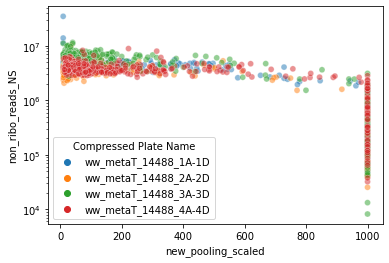

In [9]:
sns.scatterplot(x='new_pooling_scaled',y='non_ribo_reads_NS',hue='Compressed Plate Name',
               data=metaT_df,alpha=0.5)
plt.yscale('log')

/opt/meta_pooling_nb/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/meta_pooling_nb/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/meta_pooling_nb/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

<AxesSubplot:xlabel='non_ribo_reads_NS', ylabel='Density'>

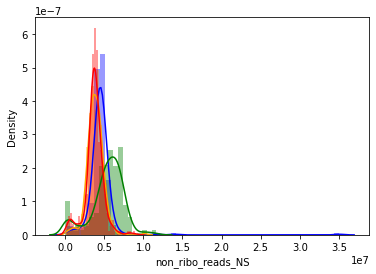

In [20]:
no_blanks_df = metaT_df.loc[metaT_df['Blank']==False]
sns.distplot(no_blanks_df.loc[no_blanks_df['Compressed Plate Name']=='ww_metaT_14488_1A-1D',
                              'non_ribo_reads_NS'],color='blue')
sns.distplot(no_blanks_df.loc[no_blanks_df['Compressed Plate Name']=='ww_metaT_14488_2A-2D',
                              'non_ribo_reads_NS'],color='orange')
sns.distplot(no_blanks_df.loc[no_blanks_df['Compressed Plate Name']=='ww_metaT_14488_3A-3D',
                              'non_ribo_reads_NS'],color='green')
sns.distplot(no_blanks_df.loc[no_blanks_df['Compressed Plate Name']=='ww_metaT_14488_4A-4D',
                              'non_ribo_reads_NS'],color='red')

In [32]:
metaT_df['ribo_reads_NS'] = metaT_df['Total Reads NS'] - metaT_df['non_ribo_reads_NS']

In [33]:
metaT_df.columns

Index(['Unnamed: 0', 'Sample', 'Row', 'Col', 'Blank', 'Project Plate',
       'Project Name', 'Compressed Plate Name', 'Well', 'Sample_Project',
       'Sample DNA Concentration', 'Sample RNA Concentration',
       'Sample cDNA Concentration', 'Sample DNAse Concentration', 'Diluted',
       'Normalized cDNA volume', 'Normalized water volume', 'Library Well',
       'index', 'index combo', 'index combo seq', 'i5 name', 'i5 sequence',
       'i5 well', 'i5 plate', 'i7 name', 'i7 sequence', 'i7 well', 'i7 plate',
       'MiniPico Library DNA Concentration', 'MiniPico Library Concentration',
       'Input DNA', 'MiniPico Pooled Volume', 'sample sheet Sample_ID',
       'Unique Reads', 'Duplicate Reads', 'Total Reads', 'wol_counts',
       'perc_pass_wol', 'rep200_counts', 'perc_pass_rep', 'counts',
       'perc_non_ribo', 'proportion', 'LoadingFactor', 'new_pooling',
       'new_pooling_50', 'new_pooling_20', 'projected_reads',
       'projected_proportion', 'projected_HO_reads', 'projecte

0


/opt/meta_pooling_nb/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/meta_pooling_nb/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
2
3


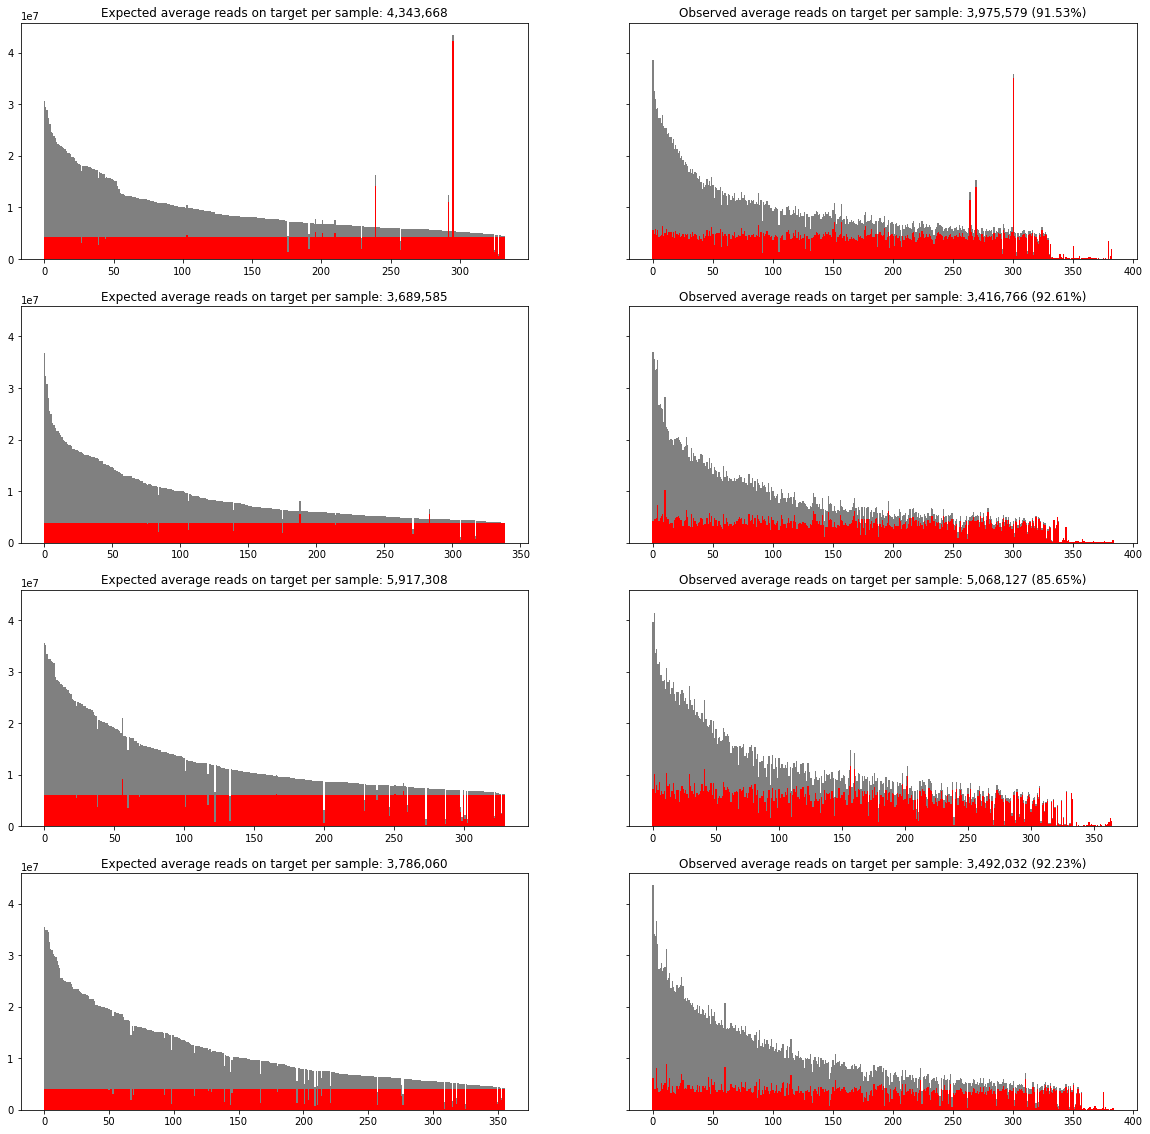

In [43]:
##setup subplots, 4 sets, 2 results so 4 rows by 2 columns
index=0
rows=4
columns=2
f, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(20,20),sharey=True)

for metaT_set in metaT_df['Compressed Plate Name'].unique():
    print(index)
    plate_df = metaT_df.loc[metaT_df['Compressed Plate Name']==metaT_set]
    plate_df.sort_values(by='projected_HO_ribo',ascending=False,inplace=True)
    plot_df = plate_df.reset_index()
    
    ##Projected
    axes[index,0].bar(range(plot_df.shape[0]), plot_df['projected_HO_non_ribo'], width=1, color='r')
    axes[index,0].bar(range(plot_df.shape[0]), plot_df['projected_HO_ribo'], bottom=plot_df['projected_HO_non_ribo'],
             width=1, align='center',color='gray')
    expected_mean = plot_df['projected_HO_non_ribo'].mean()
    axes[index,0].set_title('Expected average reads on target per sample: '+ 
                      "{:,}".format(int(expected_mean)))
    
    ##Observed
    plate_df.sort_values(by='ribo_reads_NS',ascending=False,inplace=True)
    plot_df = plate_df.reset_index()
    axes[index,1].bar(range(plot_df.shape[0]), plot_df['non_ribo_reads_NS'], width=1, color='r')
    axes[index,1].bar(range(plot_df.shape[0]), plot_df['ribo_reads_NS'], bottom=plot_df['non_ribo_reads_NS'],
             width=1, align='center',color='gray')
    observed_mean = plot_df['non_ribo_reads_NS'].mean()
    axes[index,1].set_title('Observed average reads on target per sample: '+ 
                      "{:,} ({:.2f}%)".format(int(observed_mean),float(observed_mean/expected_mean)*100))
    plot_df = plate_df.reset_index()
    index += 1
plt.show()